<a href="https://colab.research.google.com/github/NosenkoArtem/Categorical-Encoding/blob/master/DL_week_2_ipynb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Вебинар 2: Архитектура нейросетей и функции активации


**Описание**: Изучим основные элементы архитектуры нейросетей, разберем функции активации и их влияние на обучение модели.

### 0.В прошлом вебинаре

Задачи, которые решаются при помощи нейронных сетей:

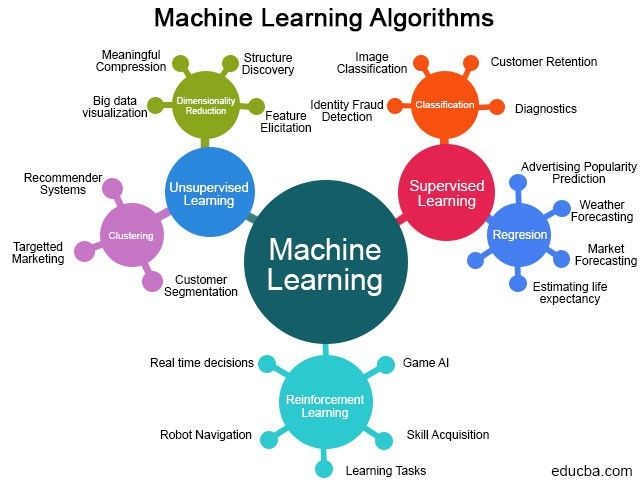

Биологический нейрон и искусственный нейрон выглядят схоже:
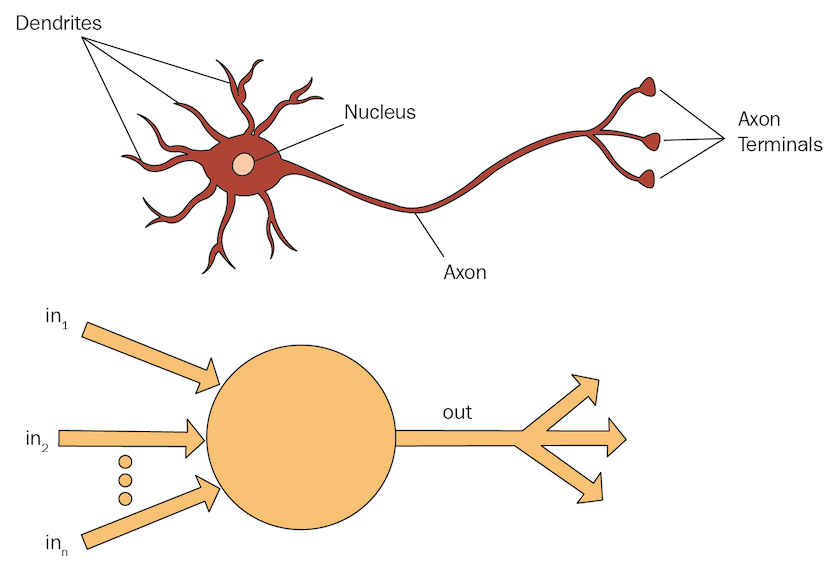

Простейшая нейронная сеть выглядит так:

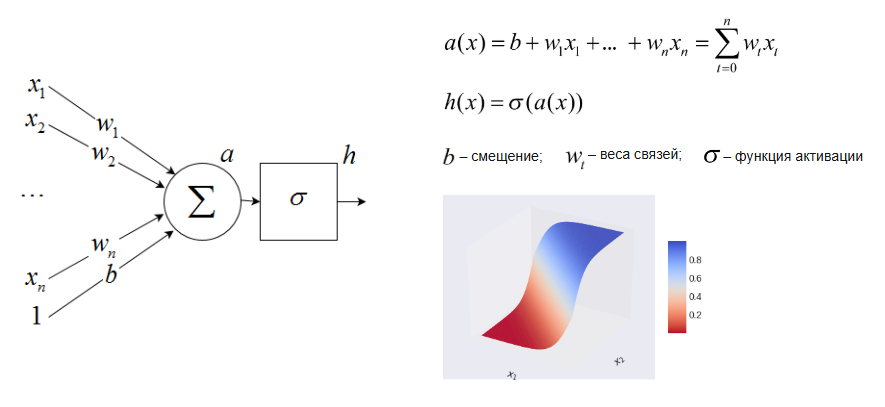

Простейшая нейронная сеть имеет непосредственную связь с обычными линейными моделями:

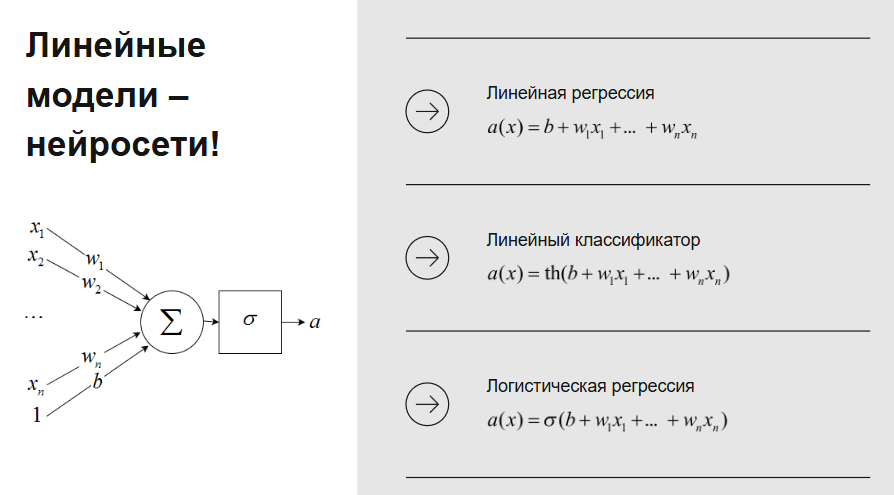

Что может один нейрон?

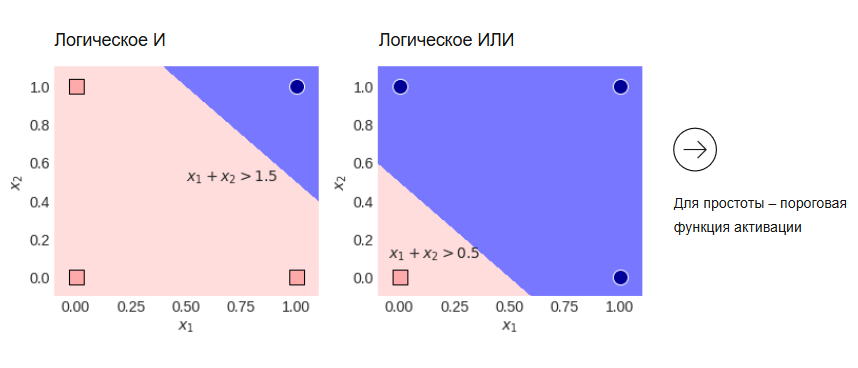

Что не может один нейрон?

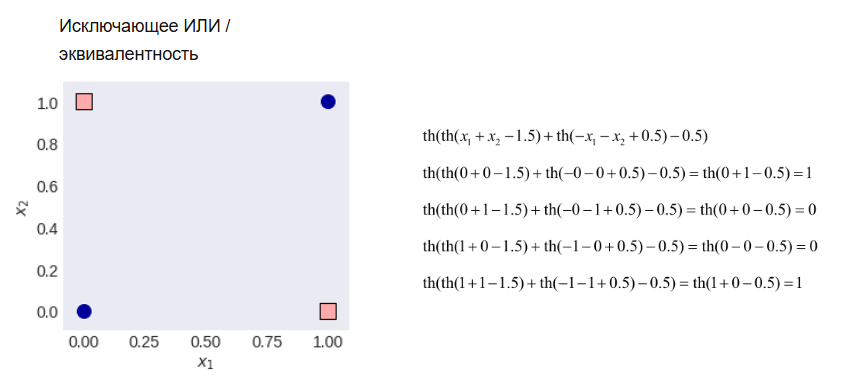

### 1. Основные элементы нейросетей

**1. Нейроны (узлы):**

* *Входные нейроны:*  Получают данные из внешнего мира (например, пиксели изображения, значения датчиков).  Они не выполняют вычислений, а просто передают данные дальше.
* *Скрытые нейроны*:  Выполняют вычисления и передают результаты другим нейронам.  Организованы в слои.  Один скрытый слой - это набор нейронов, получающих входные данные от предыдущего слоя (или входного слоя) и передающих результаты следующему слою (или выходному слою).
* *Выходные нейроны:*  Производят окончательный результат работы сети (например, классификация объекта, предсказанное значение).

**2. Связи (синапсы) и веса:**

* *Связи:*  Соединяют нейроны между собой.  Каждый нейрон в слое связан со всеми нейронами в предыдущем и следующем слоях.
* *Веса:*  Числовые значения, связанные с каждой связью.  Они определяют силу влияния одного нейрона на другой.  Именно веса настраиваются в процессе обучения сети.

**3. Функция активации:**

* *Функция активации:*  Применяется к выходу каждого нейрона (кроме входных).  Она вносит нелинейность в модель, что позволяет сети обучаться сложным зависимостям в данных.  Примеры: sigmoid, ReLU, tanh, softmax.

**4. Архитектура сети:**

* *Количество слоев:*  Сети с одним скрытым слоем называются однослойными, с несколькими - многослойными (глубокими).

* *Тип слоев:* Различные типы слоев выполняют разные функции (например, сверточные слои для обработки изображений, рекуррентные слои для обработки последовательностей).

* *Связность:*  Определяет, как нейроны связаны между собой (например, полносвязные слои, где каждый нейрон связан со всеми нейронами в предыдущем слое).

### 1.1 Нейроны (узлы) и синапсы (веса)

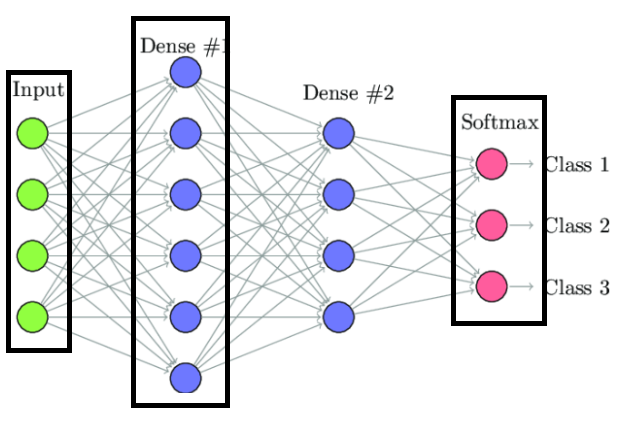

In [2]:
import torch
from torchsummary import summary

In [9]:
# определяем девайс на котором будем создавать нашу нейронную сеть
device = 'cuda' if torch.device == 'cuda' else 'cpu'
print(device)

cpu


In [16]:
class Feedforward(torch.nn.Module):
    """
    Простая полносвязная нейронная сеть (feedforward).

    Args:
        input_size (int): Размерность входного вектора.
        hidden_size (int): Размерность скрытого слоя.
    """
    def __init__(self, input_size, hidden_size):
        super(Feedforward, self).__init__()

        # Запоминаем размеры входного и скрытого слоев
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Первый полносвязный (линейный) слой
        # input_size -> hidden_size  без bias
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size, bias=False)

        # Функция активации ReLU
        self.relu = torch.nn.ReLU()

        # Второй полносвязный (линейный) слой
        # hidden_size -> 1  без bias
        self.fc2 = torch.nn.Linear(self.hidden_size, 1, bias=False)

        # Функция активации Sigmoid (для выходного слоя, подходит для бинарной классификации)
        self.sigmoid = torch.nn.Sigmoid()


    def forward(self, x):
        """
        Прямой проход данных через сеть.

        Args:
            x (torch.Tensor): Входной тензор.

        Returns:
            torch.Tensor: Выходной тензор.
        """
        # Вычисляем выход первого слоя
        hidden = self.fc1(x)

        # Применяем ReLU к выходу первого слоя
        relu = self.relu(hidden)

        # Вычисляем выход второго слоя
        output = self.fc2(relu)

        # Применяем Sigmoid к выходу второго слоя
        output = self.sigmoid(output)

        return output


Определим следующие переменные:

* $\mathbf{x}$: входной вектор размерности input_size
* $\mathbf{W}_1$: матрица весов первого линейного слоя размерности hidden_size x input_size
* $\mathbf{h}$: выход первого линейного слоя (и вход ReLU) размерности hidden_size
* $\mathbf{r}$: выход ReLU (и вход второго линейного слоя) размерности hidden_size
* $\mathbf{W}_2$: матрица весов второго линейного слоя размерности 1 x hidden_size
* $o$: выход второго линейного слоя (и вход Sigmoid) размерности 1 (скаляр)
* $y$: выход Sigmoid (и сети в целом) размерности 1 (скаляр)


Формулы для вычислений в сети:

1. **Выход первого линейного слоя:**
   
   $$\mathbf{h} = \mathbf{W}_1 \mathbf{x}$$
   

2. **Выход ReLU:**
   
   $$\mathbf{r} = \max(0, \mathbf{h})$$
   
   Поэлементно:  $r_i = \max(0, h_i)$ для всех $i$ от 1 до hidden_size.

3. **Выход второго линейного слоя:**
   
   $$o = \mathbf{W}_2 \mathbf{r}$$
   

4. **Выход Sigmoid:**
   
   $$y = \frac{1}{1 + e^{-o}}$$
   

Таким образом, полная формула для вычисления выхода сети:

$$y = \frac{1}{1 + e^{-\mathbf{W}_2 \max(0, \mathbf{W}_1 \mathbf{x})}}$$


Важно отметить, что в данном коде bias не используется в линейных слоях. Если бы bias использовался, формулы 1 и 3 выглядели бы так:

1. $\mathbf{h} = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1$
3. $o = \mathbf{W}_2 \mathbf{r} + b_2$

где $\mathbf{b}_1$ и $b_2$ — векторы bias для первого и второго линейных слоев соответственно. В случае второго слоя $b_2$ — скаляр, так как выход слоя имеет размерность 1.

<font color='DarkOrange'>**Вопрос (?)**</font> Что является весами для этой модели?

In [17]:
net = Feedforward(3, 5).to(device=device)
x = torch.tensor([1., 2., 3.])
net(x)

tensor([0.5000], grad_fn=<SigmoidBackward0>)

In [18]:
summary(net, (3,), device=device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 5]              15
              ReLU-2                    [-1, 5]               0
            Linear-3                    [-1, 1]               5
           Sigmoid-4                    [-1, 1]               0
Total params: 20
Trainable params: 20
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


<font color='DarkOrange'>**Вопрос (?)**</font> Зачем нейронную сеть делать многослойной (в нашем случае двухслойной)?

<font color='DarkOrange'>**Вопрос (?)**</font> Зачем используется `ReLU` в данной нейронной сети?

__Теорема об универсальной аппроксимации__
[Hornik, 1991]

 *Любую непрерывную функцию можно с любой
точностью приблизить нейросетью глубины 2
с сигмоидной функцией активации на скрытом
слое и линейной функции на выходном слое*


Нейросеть глубины два с фиксированной функцией
активации в первом слое и линейной функцией активации
во втором может равномерно аппроксимировать (м.б.
при увеличении числа нейронов в первом слое) любую
непрерывную функцию на компактном множестве тогда
и только тогда, когда функция активации неполиномиальная.

Но есть нюансы...

- Много нейронов (неизвестно сколько)
- Экспоненциальные веса
- Сложность обучения

Модуль [`torch.nn`](https://pytorch.org/docs/stable/nn.html) содержит большое количество уже готовых слоев

Например, есть различные варианты [линейных слоев](https://pytorch.org/docs/stable/nn.html#linear-layers)

### 2.Функции активации

#### Технический код

In [57]:
from torch import nn
import math

from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

In [58]:
set_matplotlib_formats("svg", "pdf")  # For export
sns.set()

<ipython-input-58-66ce23b69318>:1: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("svg", "pdf")  # For export


In [59]:
def vis_act_fn(act_fn, ax, x):
    # Run activation function
    y = act_fn(x)
    y_grads = get_grads(act_fn, x)
    # Push x, y and gradients back to cpu for plotting
    x, y, y_grads = x.cpu().numpy(), y.cpu().numpy(), y_grads.cpu().numpy()
    # Plotting
    ax.plot(x, y, linewidth=2, label="ActFn")
    ax.plot(x, y_grads, linewidth=2, label="Gradient")
    ax.set_title(act_fn.name)
    ax.legend()
    ax.set_ylim(-1.5, x.max())

In [60]:
def get_grads(act_fn, x):
    """Computes the gradients of an activation function at specified positions.

    Args:
        act_fn: An object of the class "ActivationFunction" with an implemented forward pass.
        x: 1D input tensor.
    Returns:
        A tensor with the same size of x containing the gradients of act_fn at x.
    """
    x = x.clone().requires_grad_()  # Mark the input as tensor for which we want to store gradients
    out = act_fn(x)
    out.sum().backward()  # Summing results in an equal gradient flow to each element in x
    return x.grad  # Accessing the gradients of x by "x.grad"

In [61]:
act_fn_by_name = {"sigmoid": Sigmoid, "tanh": Tanh, "relu": ReLU, "leakyrelu": LeakyReLU, "elu": ELU, "swish": Swish}

#### 2.1Функции активации

In [62]:
class ActivationFunction(nn.Module):
    def __init__(self):
        super().__init__()
        self.name = self.__class__.__name__
        self.config = {"name": self.name}

In [63]:
class Sigmoid(ActivationFunction):
    def forward(self, x):
        return 1 / (1 + torch.exp(-x))


class Tanh(ActivationFunction):
    def forward(self, x):
        x_exp, neg_x_exp = torch.exp(x), torch.exp(-x)
        return (x_exp - neg_x_exp) / (x_exp + neg_x_exp)

In [64]:
class ReLU(ActivationFunction):
    def forward(self, x):
        return x * (x > 0).float()


class LeakyReLU(ActivationFunction):
    def __init__(self, alpha=0.1):
        super().__init__()
        self.config["alpha"] = alpha

    def forward(self, x):
        return torch.where(x > 0, x, self.config["alpha"] * x)


class ELU(ActivationFunction):
    def forward(self, x):
        return torch.where(x > 0, x, torch.exp(x) - 1)


class Swish(ActivationFunction):
    def forward(self, x):
        return x * torch.sigmoid(x)

#### 2.2 Преимущества и недостатки функций активации

**1. Sigmoid:**

* **Формула:**  σ(x) = 1 / (1 + exp(-x))
* **Диапазон:** (0, 1)
* **Преимущества:**
    * Выходные значения интерпретируются как вероятности.
    * Гладкая функция, имеет производную везде.
* **Недостатки:**
    * **Затухающие градиенты:**  Производная близка к нулю при больших положительных или отрицательных значениях x, что затрудняет обучение глубоких сетей.
    * **Не центрирована в нуле:**  Выходные значения всегда положительны, что может замедлить обучение.
    * **Вычислительно затратна:**  Экспонента - относительно медленная операция.

**2. Tanh (гиперболический тангенс):**

* **Формула:** tanh(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
* **Диапазон:** (-1, 1)
* **Преимущества:**
    * **Центрирована в нуле:**  Улучшает сходимость обучения по сравнению с Sigmoid.
    * **Гладкая функция, имеет производную везде.**
* **Недостатки:**
    * **Затухающие градиенты:**  Хотя и меньше, чем у Sigmoid, проблема все еще присутствует.
    * **Вычислительно затратна.**

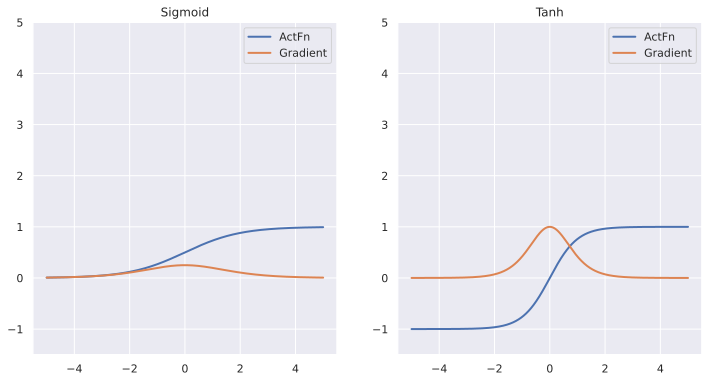

In [79]:
# Plotting
cols = 2
rows = 1
fig, ax = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))
for i, act_fn in enumerate(act_fns[:2]):
    vis_act_fn(act_fn, ax[i], x)
fig.subplots_adjust(hspace=0.3)
plt.show()

##### <font color='DarkOrange'>**Вопрос (?)**</font> Что такое проблема затухающих градиентов?

##### <font color='DarkOrange'>**Ответ**</font>



__Проблема затухающих градиентов__ — одна из основных трудностей при обучении глубоких нейронных сетей.  Она возникает из-за способа, которым сети обучаются с использованием метода обратного распространения ошибки.

__Суть проблемы:__

В процессе обучения нейронной сети веса корректируются на основе __градиентов__ — производных функции потерь по отношению к весам.  
Эти градиенты вычисляются с помощью правила цепочки, начиная с выходного слоя и продвигаясь обратно к входному.

В глубоких сетях, особенно с использованием некоторых функций активации (таких как сигмоида или, в меньшей степени, гиперболический тангенс), градиенты могут становиться экспоненциально малыми по мере продвижения к начальным слоям.  Это происходит потому, что производные этих функций активации меньше единицы в большей части их диапазона.  При умножении многих таких малых значений (по правилу цепочки) результирующий градиент становится очень близким к нулю.


__Последствия затухающих градиентов:__

* __Медленное обучение:__  Малые градиенты приводят к незначительным изменениям весов в начальных слоях, что замедляет процесс обучения, особенно в глубоких сетях.
* __Застревание в локальных минимумах:__  Сеть может застрять в локальном минимуме функции потерь, так как начальные слои не получают достаточной информации для эффективного обучения.
* __Неспособность обучаться сложным зависимостям:__  Начальные слои сети отвечают за извлечение низкоуровневых признаков, которые важны для понимания сложных зависимостей в данных.  Если эти слои не обучаются должным образом, сеть не сможет эффективно обрабатывать сложную информацию.

__Решения проблемы затухающих градиентов:__

* Использование других функций активации:  ReLU (Rectified Linear Unit) и ее варианты (LeakyReLU, ELU, Swish) не страдают от затухающих градиентов в той же степени, что и сигмоида и tanh, так как их производная равна 1 для положительных значений входа.
* Инициализация весов (Xavier/Glorot, He):  Специальные методы инициализации весов помогают смягчить проблему затухающих градиентов.
* Нормализация по батчам (Batch Normalization):  Нормализует активации внутри мини-батча, что стабилизирует обучение и уменьшает влияние затухающих градиентов.
* Архитектуры с остаточными соединениями (ResNets):  Остаточные соединения позволяют градиентам "протекать" через сеть, минуя некоторые слои, что уменьшает вероятность их затухания.
* Градиентное отсечение (Gradient Clipping):  Ограничивает максимальное значение градиента, предотвращая его взрывной рост (который может быть обратной стороной затухающих градиентов в некоторых случаях).

####**3. ReLU (Rectified Linear Unit):**

* **Формула:** f(x) = max(0, x)
* **Диапазон:** [0, ∞)
* **Преимущества:**
    * **Решение проблемы затухающих градиентов** (для положительных значений x).
    * **Вычислительно эффективна:**  Простая операция сравнения.
    * **Ускоряет обучение:**  Благодаря отсутствию затухающих градиентов (для положительных x).
* **Недостатки:**
    * **"Умирающие нейроны":**  Нейроны могут "умереть" (всегда выводить ноль), если входные веса обновляются таким образом, что взвешенная сумма входов становится отрицательной.  Это особенно проблематично при больших темпах обучения.
    * **Не центрирована в нуле.**


**4. LeakyReLU:**

* **Формула:** f(x) = max(αx, x), где α - небольшое положительное число (например, 0.01).
* **Диапазон:** (-∞, ∞)
* **Преимущества:**
    * **Решение проблемы "умирающих нейронов" ReLU.**  Небольшое отрицательное значение позволяет градиентам продолжать распространяться даже при отрицательных x.
    * **Вычислительно эффективна.**
* **Недостатки:**
    * **α - гиперпараметр, который нужно подбирать.**
    * **Не центрирована в нуле.**

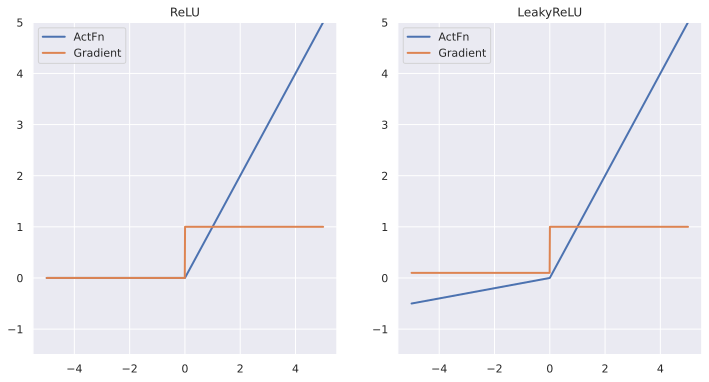

In [78]:
# Plotting
cols = 2
rows = 1
fig, ax = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))
for i, act_fn in enumerate(act_fns[2:4]):
    vis_act_fn(act_fn, ax[i], x)
fig.subplots_adjust(hspace=0.3)
plt.show()

##### <font color='DarkOrange'>**Вопрос (?)**</font> Что такое проблема "умирающих" нейронов?

##### <font color='DarkOrange'>**Ответ**</font>

__Проблема умирающих нейронов (dying ReLU problem)__ — это явление, которое может возникнуть в нейронных сетях, использующих функцию активации ReLU (Rectified Linear Unit) или ее варианты.  Она заключается в том, что некоторые нейроны могут перестать обновляться во время обучения и, по сути, стать неактивными, всегда выводя ноль.  Это негативно сказывается на производительности сети, поскольку уменьшает ее эффективную емкость.


__Как это происходит:__

1. ReLU обнуляет отрицательные значения: Функция ReLU определяется как f(x) = max(0, x).  Это означает, что для любого отрицательного входного значения x выход ReLU будет равен нулю.

2. Большие обновления весов:  Во время обучения, особенно с большими темпами обучения или при определенных инициализациях весов, обновления весов могут быть значительными.

3. Нейрон "застревает" в отрицательной области:  Если обновление весов приводит к тому, что взвешенная сумма входов нейрона становится существенно отрицательной, ReLU будет выводить ноль.  Градиент, проходящий через этот нейрон, также будет равен нулю (для отрицательных значений).

4. Нейрон перестает обучаться:  Нулевой градиент означает, что веса, связанные с этим нейроном, больше не будут обновляться во время обратного распространения ошибки.  Нейрон становится "мертвым" и всегда будет выводить ноль, независимо от входных данных.

__Способы решения проблемы:__

* Использование вариантов ReLU:  Существуют варианты ReLU, которые решают проблему умирающих нейронов, например:
    * Leaky ReLU: f(x) = max(αx, x), где α - небольшое положительное число (например, 0.01).  Это позволяет градиенту проходить даже через отрицательные значения, предотвращая полное "отключение" нейрона.
    * Parametric ReLU (PReLU):  Похож на Leaky ReLU, но α является обучаемым параметром.
    * ELU (Exponential Linear Unit):  Использует экспоненциальную функцию для отрицательных значений, что также позволяет избежать нулевого градиента.
    * Swish:  Более сложная функция, которая также эффективно решает проблему умирающих нейронов.

* Меньший темп обучения:  Уменьшение темпа обучения может снизить вероятность больших обновлений весов, которые могут привести к "смерти" нейронов.

* Тщательная инициализация весов:  Правильная инициализация весов может уменьшить вероятность того, что нейроны окажутся в отрицательной области в начале обучения.

####**5. ELU (Exponential Linear Unit):**

* **Формула:** f(x) = {x, если x > 0; α(exp(x) - 1), если x ≤ 0}, где α - гиперпараметр.
* **Диапазон:** (-α, ∞)
* **Преимущества:**
    * **Решение проблемы "умирающих нейронов".**
    * **Ближе к нулевому среднему:**  Потенциально может ускорить обучение.
* **Недостатки:**
    * **Вычислительно затратнее, чем ReLU и LeakyReLU** из-за экспоненты.
    * **α - гиперпараметр, который нужно подбирать.**


**6. Swish:**

* **Формула:** f(x) = x * sigmoid(βx), где β - гиперпараметр или обучаемый параметр.
* **Диапазон:** (-∞, ∞) (при β = 1)
* **Преимущества:**
    * **Гладкая функция:**  Может улучшить обобщающую способность модели.
    * **Немонотонная:**  Может моделировать более сложные зависимости.
    * **Работает хорошо на практике:**  В некоторых случаях показывает лучшие результаты, чем ReLU.
* **Недостатки:**
    * **Вычислительно затратнее, чем ReLU.**
    * **β - гиперпараметр, который нужно подбирать (или обучаемый параметр, что усложняет обучение).**


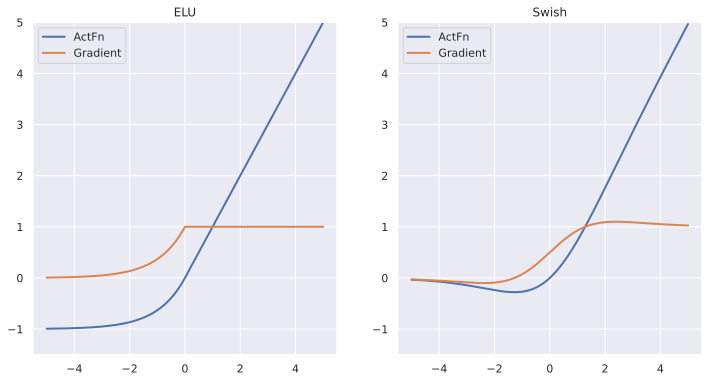

In [80]:
# Plotting
cols = 2
rows = 1
fig, ax = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))
for i, act_fn in enumerate(act_fns[4:]):
    vis_act_fn(act_fn, ax[i], x)
fig.subplots_adjust(hspace=0.3)
plt.show()

### 3.Зачем нужны глубокие нейросети?

Большие модели требуют меньше данных для обучения (cм. левую картинку), [статья](https://arxiv.org/pdf/2001.08361)

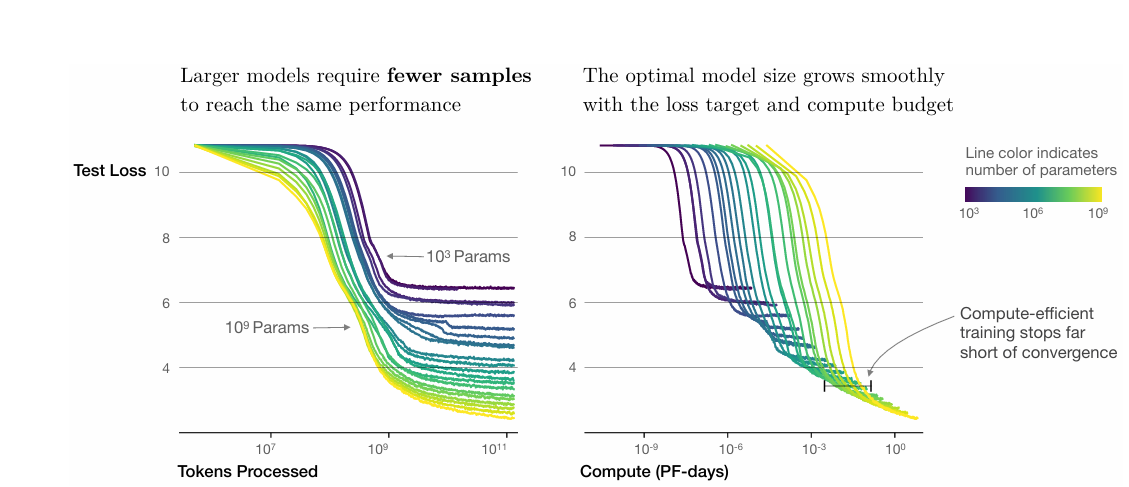

В какой-то момент при увеличении вычислений при обучении модели начинают резко улушать качество работы

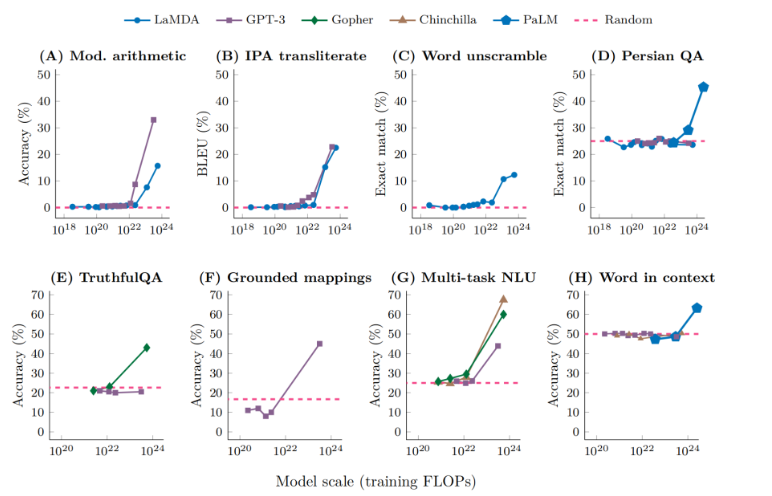